In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D,
                                     Dense, Dropout, Input, InputLayer)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy, Recall
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [14]:

(x_train_original, y_train_original), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_original, y_train_original, test_size=0.1, random_state=42)

print(f"Set de antrenament: {x_train.shape}")
print(f"Set de validare: {x_val.shape}")
print(f"Set de testare: {x_test.shape}")

Set de antrenament: (54000, 28, 28)
Set de validare: (6000, 28, 28)
Set de testare: (10000, 28, 28)


Normalizarea datelor

In [15]:
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

one-hot ecoded

In [22]:
num_classes = 10
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_encoded = tf.keras.utils.to_categorical(y_val, num_classes)
y_test_encoded=tf.keras.utils.to_categorical(y_test, num_classes)


In [17]:
model = Sequential([
    InputLayer(shape=(28,28,1)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
], name="recunoasterea_cifrelor_scrise_de_mana")

model.summary()

Model: "recunoasterea_cifrelor_scrise_de_mana"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy','recall']

)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

history = model.fit(
    x_train, y_train_encoded,
    validation_data=(x_val, y_val_encoded),
    epochs=40,
    batch_size=64,
    callbacks=callbacks
)

Epoch 1/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 55s 63ms/step - accuracy: 0.8427 - loss: 0.5093 - recall: 0.7691 - val_accuracy: 0.9830 - val_loss: 0.0583 - val_recall: 0.9797
Epoch 2/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - accuracy: 0.9738 - loss: 0.0918 - recall: 0.9697 - val_accuracy: 0.9887 - val_loss: 0.0383 - val_recall: 0.9873
Epoch 3/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 54s 63ms/step - accuracy: 0.9816 - loss: 0.0601 - recall: 0.9786 - val_accuracy: 0.9882 - val_loss: 0.0331 - val_recall: 0.9870
Epoch 4/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 53s 63ms/step - accuracy: 0.9852 - loss: 0.0505 - recall: 0.9834 - val_accuracy: 0.9887 - val_loss: 0.0382 - val_recall: 0.9877
Epoch 5/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 60ms/step - accuracy: 0.9881 - loss: 0.0399 - recall: 0.9868 - val_accuracy: 0.9910 - val_loss: 0.0319 - val_recall: 0.9903
Epoch 6/40
844/844 ━━━━━━━━━━━━━━━━━━━━ 53s 63ms/step - accuracy: 0.9880 - loss: 0.0379 - recall: 0.9865 - val_accuracy: 0.9895 - val_loss: 0.0320 - val_recall:

In [25]:
results = model.evaluate(x_test, y_test_encoded, verbose=0)
print("Test loss, Test accuracy, Test recall:", results)

Test loss, Test accuracy, Test recall: [0.026211058720946312, 0.9915000200271606, 0.991100013256073]


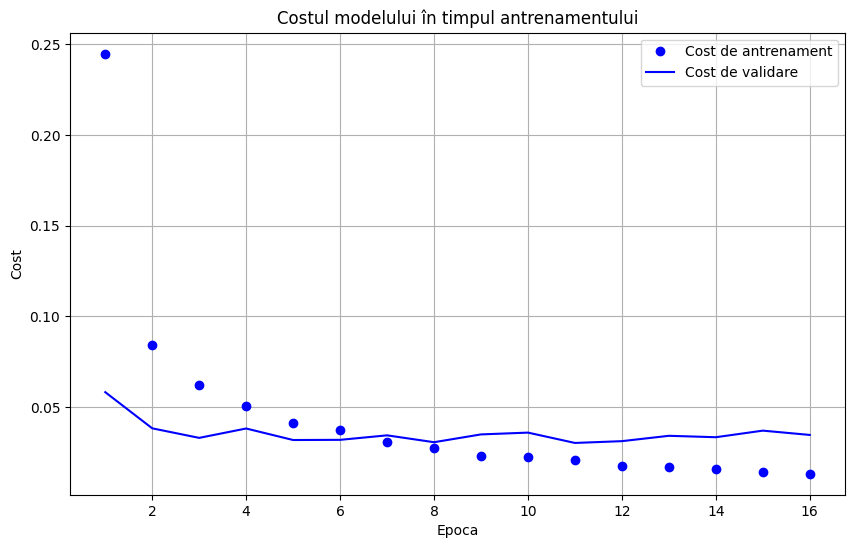

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Cost de antrenament')
plt.plot(epochs, val_loss, 'b', label='Cost de validare')

plt.title('Costul modelului în timpul antrenamentului')
plt.xlabel('Epoca')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)

plt.show()
